In [1]:
# Okay, here we will dive deeper into vitamin E. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import os

In [3]:
query_vc = """ 
SELECT * FROM vegetables
WHERE food_group_id = 1100
AND long_desc LIKE '%cook%'
AND NOT(long_desc LIKE "%beans%"
     OR long_desc LIKE "%peas%"
     OR long_desc LIKE "%lentils%"
     OR long_desc LIKE "%leaves%"
	 OR long_desc LIKE "%greens%"
	 OR long_desc LIKE "%mushroom%"
  	 OR long_desc LIKE "%frozen%"
 	 OR long_desc LIKE "%with salt%");
"""


query_vr = """ 
SELECT * FROM vegetables
WHERE food_group_id = 1100
AND long_desc LIKE '%raw%'
AND NOT(long_desc LIKE "%beans%"
     OR long_desc LIKE "%peas%"
     OR long_desc LIKE "%lentils%"
     OR long_desc LIKE "%leaves%"
	 OR long_desc LIKE "%greens%"
	 OR long_desc LIKE "%mushroom%"
      );
"""

query_fd = """ 
SELECT * FROM fruits_dried
WHERE food_group_id = 900
AND (long_desc LIKE "%dried%"
OR long_desc LIKE "%dehydrated%")
AND NOT (long_desc LIKE "%juice%"
OR long_desc LIKE "%sauce%"
OR long_desc LIKE "%canned%"
OR long_desc LIKE "%frozen%"
OR long_desc LIKE "%peel%"
OR long_desc LIKE "%cooked%"
OR long_desc LIKE "%California%"
OR long_desc LIKE "%Florida%"
OR long_desc LIKE "%navels%"
OR id LIKE "9111"
);
"""

query_fr = """ 
SELECT * FROM fruits_raw
WHERE food_group_id = 900
AND NOT (long_desc LIKE "%juice%"
OR long_desc LIKE "%sauce%"
OR long_desc LIKE "%canned%"
OR long_desc LIKE "%frozen%"
OR long_desc LIKE "%dried%"
OR long_desc LIKE "%dehydrated%"
OR long_desc LIKE "%peel%"
OR long_desc LIKE "%cooked%"
OR long_desc LIKE "%California%"
OR long_desc LIKE "%Florida%"
OR long_desc LIKE "%navels%"
OR id LIKE "9111"
);
"""

database_url = 'sqlite:///C:/Users/Vartotojas/Desktop/programavimas/baigiamasis_darbas/db/db.sqlite3'

engine = create_engine(database_url)

with engine.connect() as conn:
     df_v_fr = pd.read_sql_query(query_fr, engine)
     df_v_vc = pd.read_sql_query(query_vc, engine)
     df_v_fd = pd.read_sql_query(query_fd, engine)
     df_v_vr = pd.read_sql_query(query_vr, engine)


<Figure size 600x300 with 0 Axes>

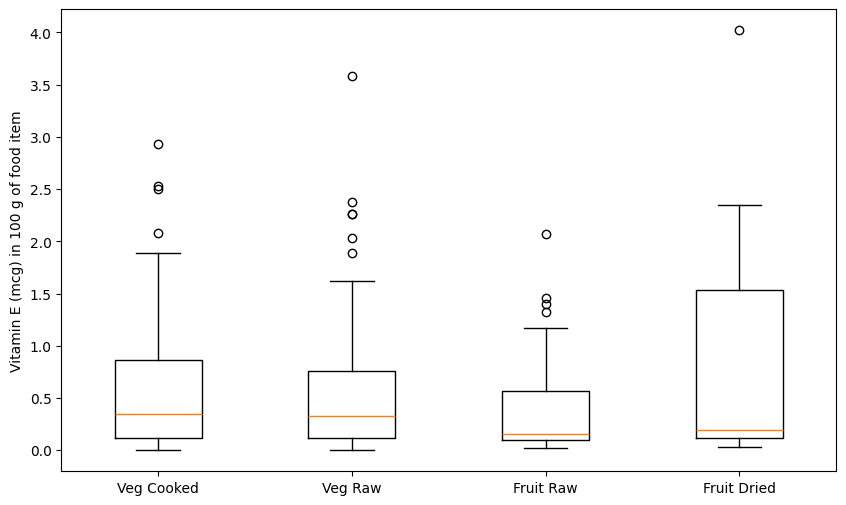

In [4]:
# Let's see how Vitamin E content distributes between 100kcal of products:

data = [df_v_vc['vitamin_e_in_mg'], df_v_vr['vitamin_e_in_mg'], df_v_fr['vitamin_e_in_mg'], df_v_fd['vitamin_e_in_mg']]
 
fig = plt.figure(figsize =(6, 3))
 
# Creating axes instance
labels = ['Veg Cooked', 'Veg Raw', 'Fruit Raw', 'Fruit Dried']
fig, ax = plt.subplots(figsize=(10, 6))
plt.ylabel('Vitamin E (mcg) in 100 g of food item')
 
# Creating plot
bp = ax.boxplot(data, labels=labels)
 
# show plot
plt.show()

In [5]:
# Top Vitamin E in 100g:

top = df_v_vc[['long_desc', 'vitamin_e_in_mg']].sort_values(by="vitamin_e_in_mg",ascending=False)
top_30_values = top.head(30)
print(top_30_values)

                                            long_desc  vitamin_e_in_mg
50                         Taro, cooked, without salt             2.93
6                               Broccoli raab, cooked             2.53
17  Chrysanthemum, garland, cooked, boiled, draine...             2.50
41     Spinach, cooked, boiled, drained, without salt             2.08
15  Chard, swiss, cooked, boiled, drained, without...             1.89
26  Lambsquarters, cooked, boiled, drained, withou...             1.85
58  Peppers, sweet, red, cooked, boiled, drained, ...             1.65
1                  Asparagus, cooked, boiled, drained             1.50
2   Balsam-pear (bitter gourd), leafy tips, cooked...             1.45
5     Broccoli, cooked, boiled, drained, without salt             1.45
45  Squash, winter, butternut, cooked, baked, with...             1.29
12     Carrots, cooked, boiled, drained, without salt             1.03
31    Parsnips, cooked, boiled, drained, without salt             1.00
49    

In [6]:
# Top Vitamin E in 100kcal:

top = df_v_vc[['long_desc', 'vitamin_e_in_mg_100kcal']].sort_values(by='vitamin_e_in_mg_100kcal',ascending=False)
top_30_values = top.head(30)
print(top_30_values)

                                            long_desc  vitamin_e_in_mg_100kcal
17  Chrysanthemum, garland, cooked, boiled, draine...                12.500000
15  Chard, swiss, cooked, boiled, drained, without...                 9.450000
41     Spinach, cooked, boiled, drained, without salt                 9.043478
6                               Broccoli raab, cooked                 7.666667
1                  Asparagus, cooked, boiled, drained                 6.818182
58  Peppers, sweet, red, cooked, boiled, drained, ...                 5.892857
26  Lambsquarters, cooked, boiled, drained, withou...                 5.781250
2   Balsam-pear (bitter gourd), leafy tips, cooked...                 4.264706
33  Pokeberry shoots, (poke), cooked, boiled, drai...                 4.250000
5     Broccoli, cooked, boiled, drained, without salt                 4.142857
37     Pumpkin, cooked, boiled, drained, without salt                 4.000000
45  Squash, winter, butternut, cooked, baked, with..

<Figure size 600x300 with 0 Axes>

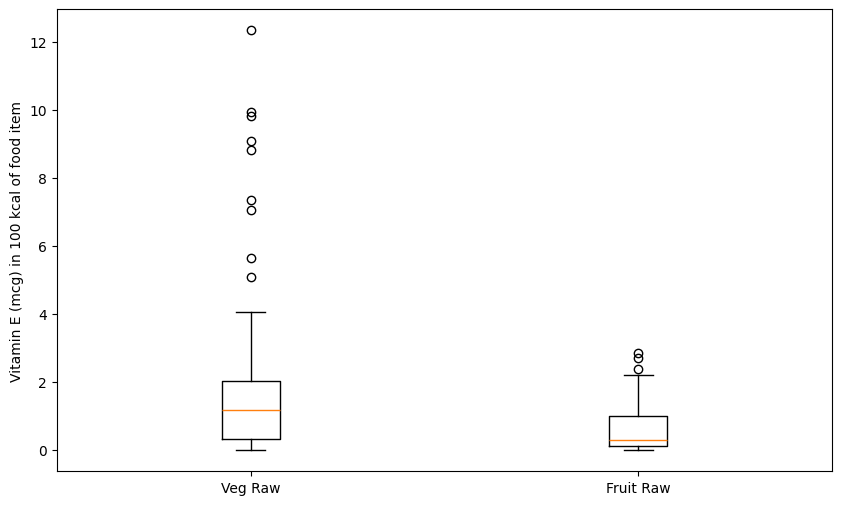

In [7]:
# Let's see how vitamin E content distributes between 100kcal of products:

data = [df_v_vr['vitamin_e_in_mg_100kcal'], df_v_fr['vitamin_e_in_mg_100kcal']]
 
fig = plt.figure(figsize =(6, 3))
 
# Creating axes instance
labels = ['Veg Raw', 'Fruit Raw']
fig, ax = plt.subplots(figsize=(10, 6))
plt.ylabel('Vitamin E (mcg) in 100 kcal of food item')
 
# Creating plot
bp = ax.boxplot(data, labels=labels)
 
# show plot
plt.show()